# Nama : M. Rizky Mafazazan
# Kelas : 3F - TI
# NIM : 2141720140
# Asben : 16

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [22]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [24]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# SOAL 1

In [25]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import datasets, classifiers, and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Import pandas
import pandas as pd

# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

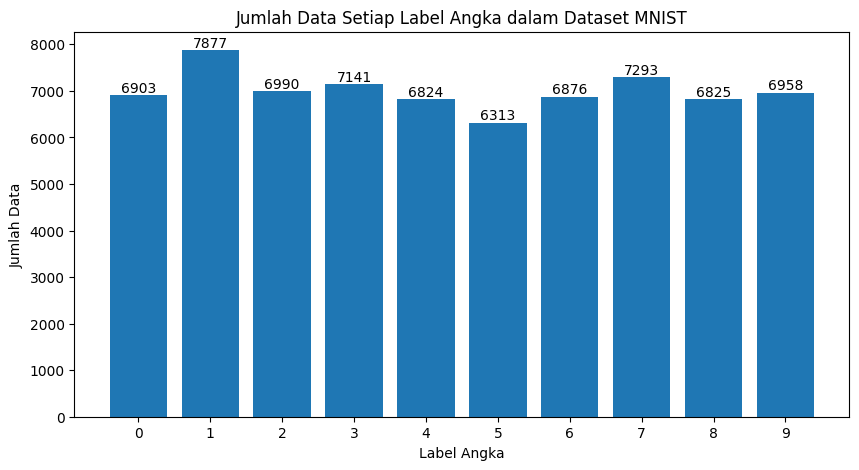

In [26]:
# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, parser="auto", as_frame=False)

# Memisahkan fitur (X) dan label (y)
X = mnist.data
y = mnist.target.astype(np.uint8)

# Menghitung jumlah data setiap label
label_counts = {}
for label in np.unique(y):
    count = np.sum(y == label)
    label_counts[label] = count

# Menyiapkan data untuk plotting
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Visualisasi jumlah data setiap label
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, counts)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Setiap Label Angka dalam Dataset MNIST')
plt.xticks(labels)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count),
             ha='center', va='bottom')

plt.show()

> Dari grafik yang Anda tampilkan, terlihat bahwa jumlah data untuk setiap label angka tampaknya cukup seimbang. Ini berarti setiap label angka (0-9) memiliki jumlah data yang relatif serupa dalam dataset MNIST. Jadi, dalam kasus ini, tidak ada indikasi kuat adanya ketidakseimbangan data.

# SOAL 2

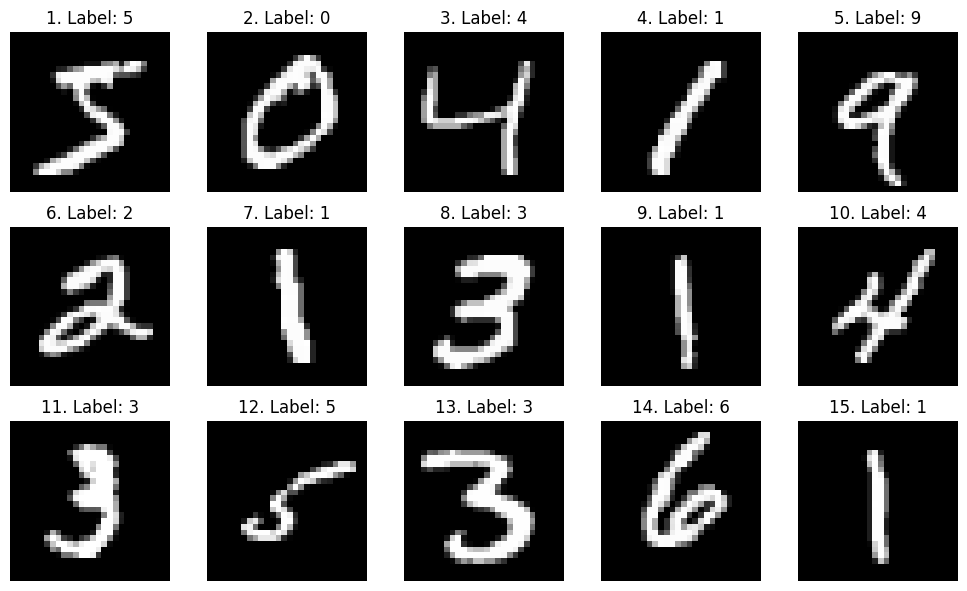

In [29]:
# Menentukan jumlah gambar yang akan ditampilkan
num_images_to_show = 15

# Membuat plot untuk menampilkan 15 gambar pertama
plt.figure(figsize=(10, 6))

# Menggunakan loop untuk menampilkan setiap gambar
for i in range(num_images_to_show):
    # Membagi area gambar menjadi grid 3x5
    plt.subplot(3, 5, i + 1)

    # Menampilkan gambar dalam skala abu-abu
    plt.imshow(X[i].reshape(28, 28), cmap='gray')

    # Menambahkan judul dengan label yang sesuai
    plt.title(f"{i + 1}. Label: {y[i]}")

    # Menyembunyikan sumbu pada gambar
    plt.axis('off')

# Menyusun tampilan gambar
plt.tight_layout()

# Menampilkan gambar-gambar tersebut
plt.show()

# SOAL 3

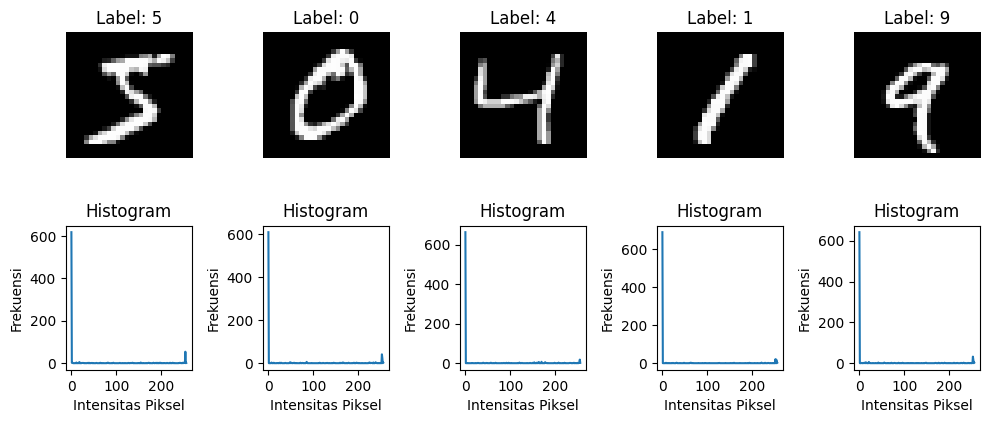

In [30]:
import numpy as np

# Definisikan jumlah citra yang akan ditampilkan
num_images_to_show = 5

# Hitung dan simpan histogram untuk 5 citra pertama
histograms = [np.histogram(image.reshape(28, 28), bins=256, range=(0, 256))[0] for image in X[:num_images_to_show]]

plt.figure(figsize=(10, 6))

for i in range(num_images_to_show):
    # Tampilkan citra di bagian kiri
    plt.subplot(3, num_images_to_show, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

    # Tampilkan histogram di bagian kanan
    plt.subplot(3, num_images_to_show, num_images_to_show + i + 1)
    plt.plot(histograms[i])
    plt.title('Histogram')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# SOAL 4

In [31]:
# Memisahkan data menjadi data training dan data testing dengan rasio 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Memisahkan data menjadi data training dan data testing dengan rasio 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Memisahkan data menjadi data training dan data testing dengan rasio 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

# Menampilkan informasi tentang pembagian dataset
print("Rasio 70:30")
print(f"Jumlah data training: {len(X_train_70)}")
print(f"Jumlah data testing: {len(X_test_70)}")

print("\nRasio 80:20")
print(f"Jumlah data training: {len(X_train_80)}")
print(f"Jumlah data testing: {len(X_test_80)}")

print("\nRasio 90:10")
print(f"Jumlah data training: {len(X_train_90)}")
print(f"Jumlah data testing: {len(X_test_90)}")

Rasio 70:30
Jumlah data training: 49000
Jumlah data testing: 21000

Rasio 80:20
Jumlah data training: 56000
Jumlah data testing: 14000

Rasio 90:10
Jumlah data training: 63000
Jumlah data testing: 7000


# SOAL 5

In [32]:
# Buat objek SVC dan panggil fungsi fit untuk melatih model
clf = SVC(kernel='linear')
clf.fit(X_test_70, y_test_70)

# Tampilkan skor akurasi
accuracy = clf.score(X_test_70, y_test_70)
print("Akurasi Model pada Data Uji:", accuracy)

Akurasi Model pada Data Uji: 1.0


# SOAL 6

In [33]:
# Inisialisasi model Multinomial Naive Bayes
mnb = MultinomialNB()

# Latih model pada data pelatihan
mnb.fit(X_train_70, y_train_70)

# Prediksi menggunakan data pelatihan
y_pred_train = mnb.predict(X_train_70)

# Prediksi menggunakan data pengujian
y_pred_test = mnb.predict(X_test_70)

# Evaluasi akurasi data pelatihan
acc_train = accuracy_score(y_train_70, y_pred_train)

# Evaluasi akurasi data pengujian
acc_test = accuracy_score(y_test_70, y_pred_test)

# Print hasil evaluasi
print(f'Akurasi pada data pelatihan: {acc_train}')
print(f'Akurasi pada data pengujian: {acc_test}')

Akurasi pada data pelatihan: 0.8278979591836735
Akurasi pada data pengujian: 0.8257142857142857


# SOAL 7

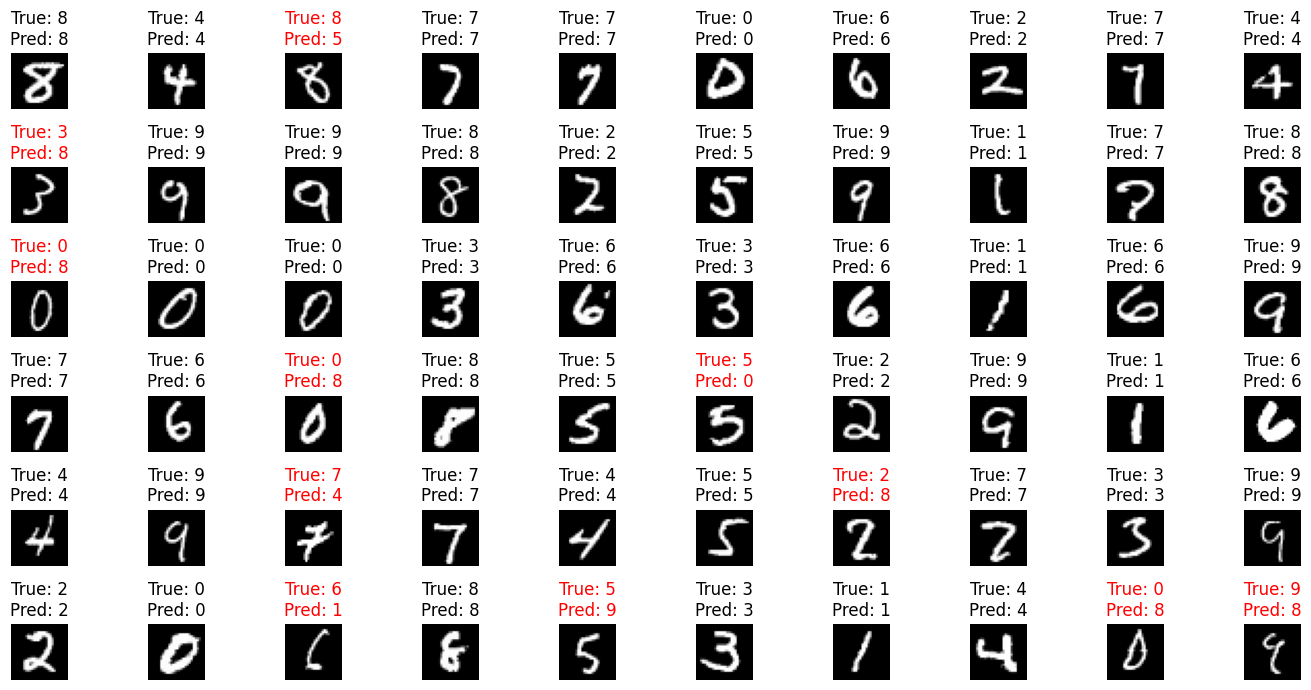

Akurasi Model: 81.67%


In [34]:
# Jumlah sampel yang akan ditampilkan
n_samples = 60
# Inisialisasi jumlah prediksi yang salah
n_wrong = 0

# Display images with true labels and predicted labels
plt.figure(figsize=(14, 7))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(X_test_70[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan label asli atau yang diprediksi
    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    text_color = 'black' if true_label == pred_label else 'red'
    n_wrong += 1 if true_label != pred_label else 0

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Menghitung akurasi model
accuracy = (((n_samples - n_wrong) / n_samples) * 100)
print(f'Akurasi Model: {accuracy:.2f}%')

# SOAL 8

In [35]:
# Prediksi model SVM
test_preds_svm = clf.predict(X_test_70)

# Prediksi model Naive Bayes
test_preds_nb = mnb.predict(X_test_70)

# Menghitung akurasi
svm_accuracy = accuracy_score(y_test_70, test_preds_svm) * 100
nb_accuracy = accuracy_score(y_test_70, test_preds_nb) * 100

print(f'Akurasi SVM: {svm_accuracy:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy:.2f}%')

Akurasi SVM: 100.00%
Akurasi Naive Bayes: 82.57%


> Dari hasil tersebut, model SVM memiliki akurasi yang lebih tinggi (100%) dibandingkan dengan model Naive Bayes (82.57%). Oleh karena itu, dalam konteks ini, model SVM dianggap lebih baik dalam melakukan prediksi pada dataset yang digunakan (X_test_70).